In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [100]:
# Load the dataset
# (You need to replace the path with the actual location of the dataset)
# df1 = pd.read_csv('/content/AirQualityUCI.csv')
df2 = pd.read_excel("/content/AirQualityUCI.xlsx")

In [11]:
df2.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [81]:
print(df2.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [82]:
# Check for the presence of -200 in the entire DataFrame
(df2 == -200).sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [9]:
# Preprocess the data
# Drop any unnecessary columns (e.g., Date, Time, Unnamed column)
df2.drop(columns=['Date', 'Time'], inplace=True)

In [62]:
# Handle missing values (replace -200 or NA values with NaN)
df2.replace(-200, np.nan, inplace=True)

In [69]:
# Drop rows with missing values (for simplicity, other strategies could be applied like imputation)
df2.dropna(inplace=True)

In [70]:
# (Let's assume the target is CO(GT), i.e., CO concentration, and we'll use other columns as features)
X = df2.drop(columns=['CO(GT)'])  # Features
y = df2['CO(GT)']  # Target (CO concentration)

In [71]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Standardize the features (SVR is sensitive to the scale of the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Initialize the SVR model with the RBF kernel
svr_model = SVR(kernel='poly', C=1, gamma='auto')

In [74]:
# Train the SVR model
svr_model.fit(X_train_scaled, y_train)

SVR(C=0.1, gamma='auto', kernel='poly')

In [75]:
# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

In [76]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [77]:
# Display the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 0.39428716456570523
Mean Absolute Error (MAE): 0.4583947485035168
R^2 Score: 0.7938672463039727


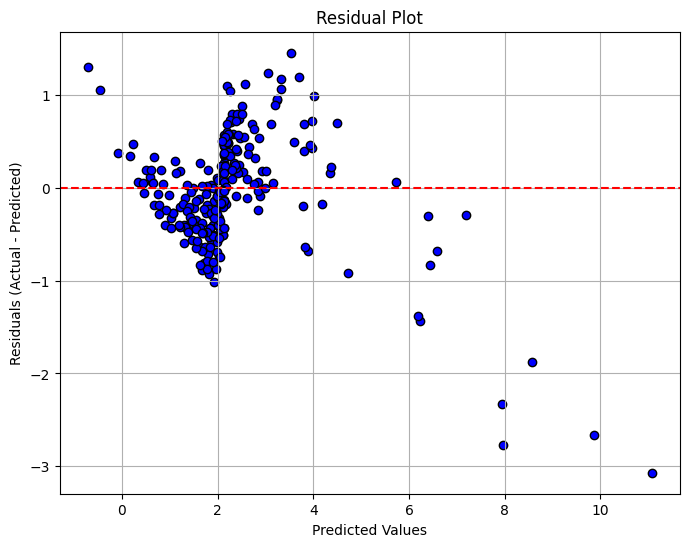

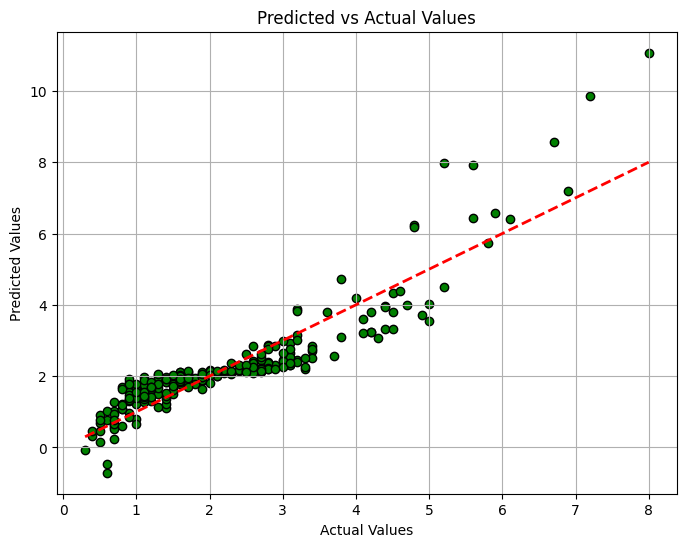

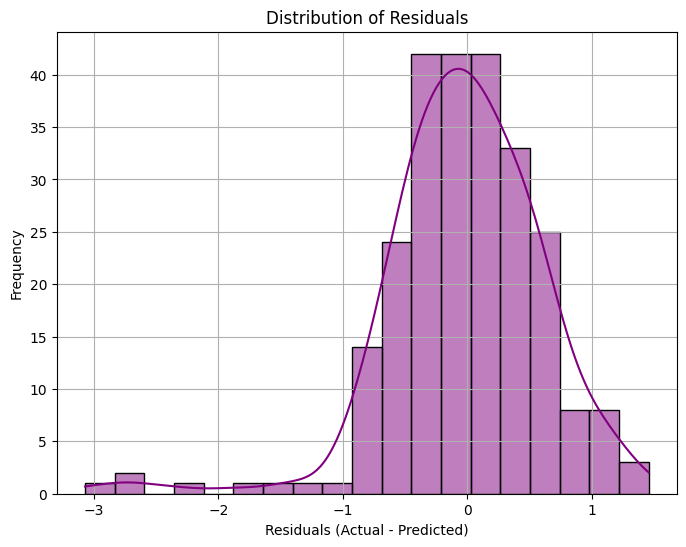

In [78]:
# Import additional libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = y_test - y_pred

# 1. Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

# 2. Predicted vs Actual Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # 45-degree line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# 3. Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Try

In [101]:
df= pd.read_csv('/content/AirQualityUCI.csv', sep=';')


In [95]:
df.shape

(9471, 17)

In [85]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [102]:
# Count the number of negative values in a column (e.g., 'CO(GT)')
negative_count = (df2['CO(GT)'] < 0).sum()
print(f"There are {negative_count} negative values in the column 'CO(GT)'.")

There are 1683 negative values in the column 'CO(GT)'.


In [96]:
# Preprocess the data
# Drop any unnecessary columns (e.g., Date, Time, Unnamed column)
df.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16','NMHC(GT)'], inplace=True)

In [97]:
# Check for the presence of -200 in the entire DataFrame
(df== -200).sum()

,0
CO(GT),0
PT08.S1(CO),366
C6H6(GT),0
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366
PT08.S5(O3),366
T,0


In [98]:
# Handle missing values (replace -200 or NA values with NaN)
df.replace(-200, np.nan, inplace=True)

# Drop rows with missing values (for simplicity, other strategies could be applied like imputation)
df.dropna(inplace=True)

In [99]:
df.shape

(7393, 12)